In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import data
data = pd.read_csv('https://raw.githubusercontent.com/abhishekgd96/Decision-Tree/main/Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data.info() # data has no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
# from problem statement it is clear that column of Population is not necessary and some columns have continous data, we need to convert them in categorical
# we also need to add the target column
y = np.empty(600, dtype=object)
i=0

for value in data['Taxable.Income']:
    if value<=30000:
        y[i]='Risky'
    else:
        y[i]='Good'
    i=i+1

In [5]:
y

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [6]:
data['Target'] = y
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [7]:
data. drop('City.Population', axis=1, inplace=True)
data

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,NO,Single,68833,10,YES,Good
1,YES,Divorced,33700,18,YES,Good
2,NO,Married,36925,30,YES,Good
3,YES,Single,50190,15,YES,Good
4,NO,Married,81002,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,76340,7,YES,Good
596,YES,Divorced,69967,2,YES,Good
597,NO,Divorced,47334,0,YES,Good
598,YES,Married,98592,17,NO,Good


In [8]:
label_encoder = preprocessing.LabelEncoder()

In [9]:
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['Target']= label_encoder.fit_transform(data['Target'])
data

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0
...,...,...,...,...,...,...
595,1,0,76340,7,1,0
596,1,0,69967,2,1,0
597,0,0,47334,0,1,0
598,1,1,98592,17,0,0


In [10]:
#Selecting our Features and Target variables
#After looking at the problem statement it can be deduced that Shelf Location at stores(A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site) is our target

y=data['Target']
x=data.iloc[:,0:5]

In [11]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [12]:
#Building Decision Tree Classifier using Entropy Criteria

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

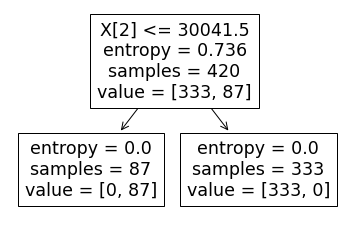

In [14]:
#Plot the decision tree
tree.plot_tree(model);

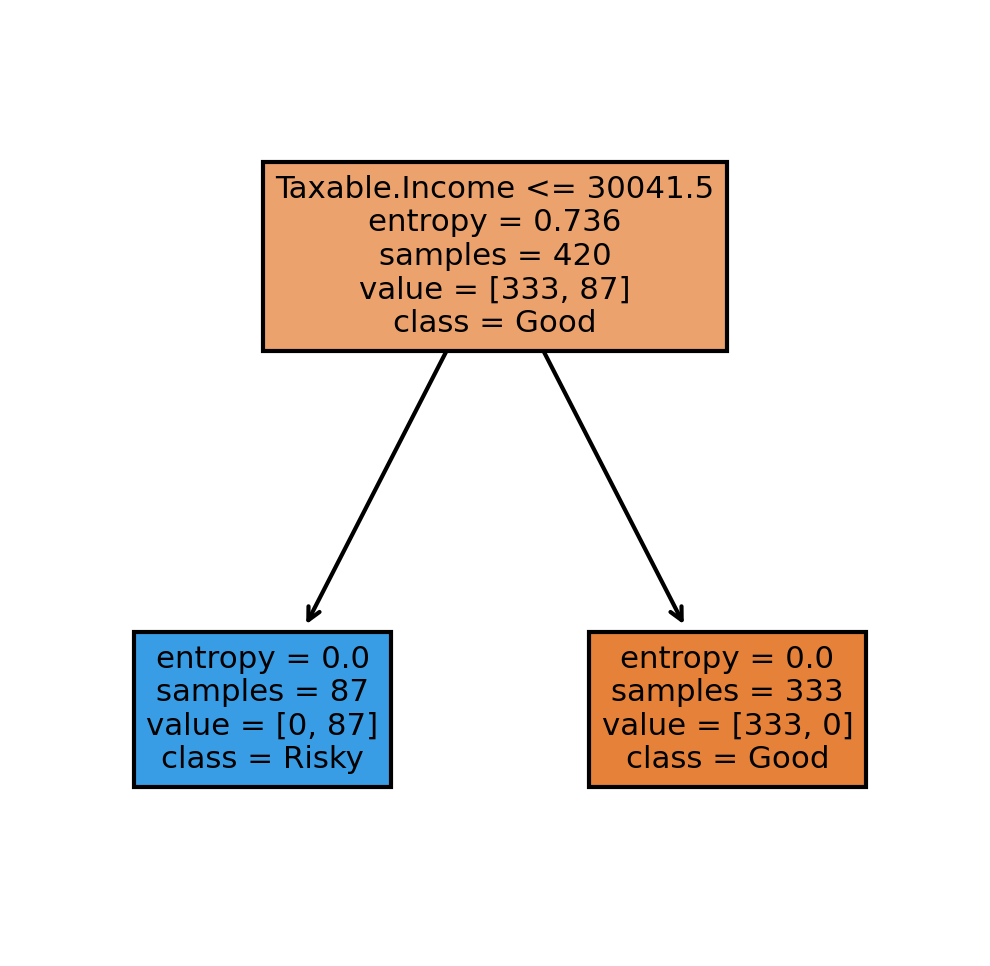

In [15]:
fn=['Undergrad', 'Marital.Status','Taxable.Income','Work.Experience','Urban']
cn =['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names = cn,
               filled = True);

In [16]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    143
1     37
dtype: int64

In [17]:
preds

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0])

In [18]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Target,,
0,143,0
1,0,37


In [19]:
# Accuracy 
np.mean(preds==y_test)

1.0

In [20]:
#Accuracy 
np.mean(preds==y_test)

1.0

In [21]:
#Building Decision Tree Classifier (CART) using Gini Criteria

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [23]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

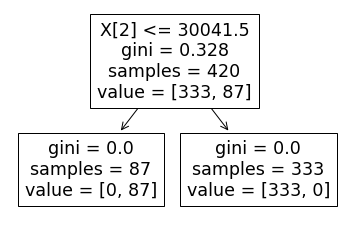

In [24]:
#Plot the decision tree
tree.plot_tree(model_gini);

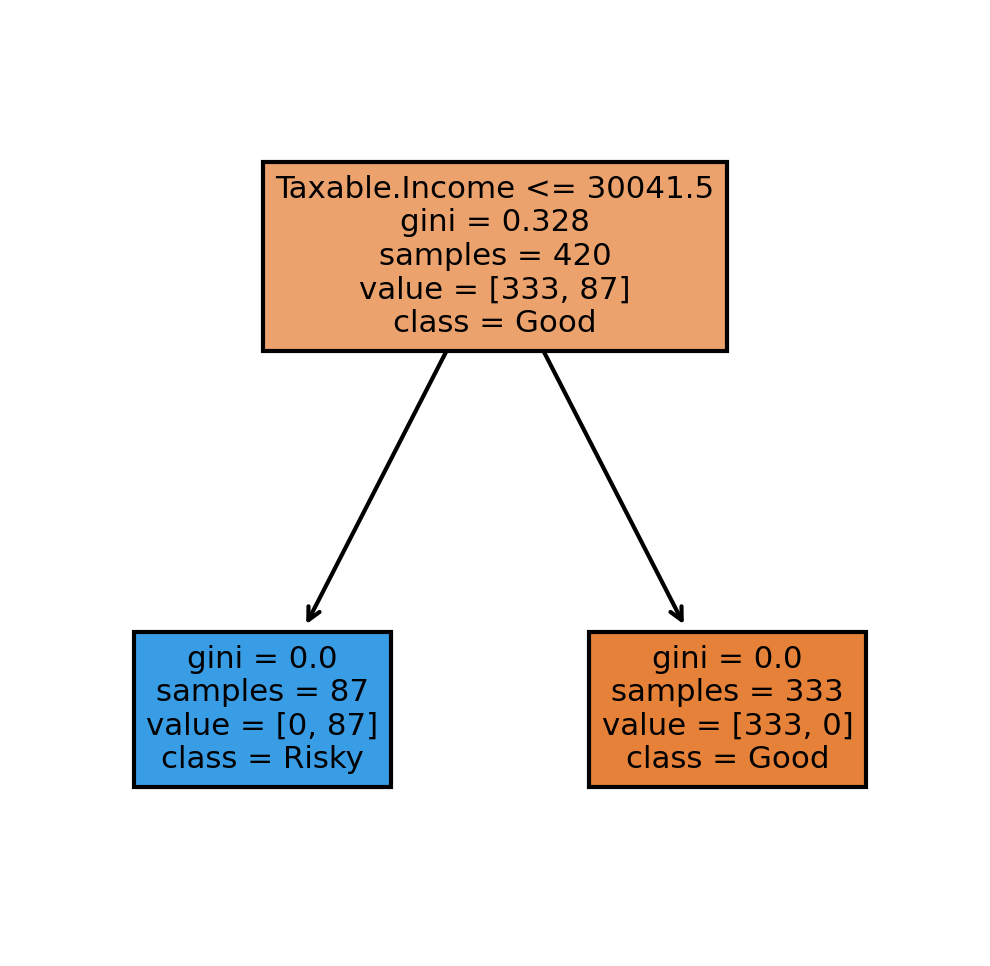

In [25]:
fn=['Undergrad', 'Marital.Status','Taxable.Income','Work.Experience','Urban']
cn =['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names = cn,
               filled = True);

In [26]:
#Prediction and computing the accuracy
ginipred=model_gini.predict(x_test)
pd.Series(ginipred).value_counts() # getting the count of each category 

0    143
1     37
dtype: int64

In [27]:
# Accuracy
np.mean(ginipred==y_test)

1.0

In [28]:
#Decision Tree gives the Taxable Income threshold to be 30041.5 which is quite close to 30000.
#After comparing Accuracy of all Entropy type and Gini type, We can adopt both models.